Prepare the environment
-----------------------

First we'll import various functions that we'll need for generating the report.

In [1]:
%matplotlib inline

from os import environ
from os.path import join, exists, expandvars
import pandas as pd
from skbio.draw import boxplots

from taxcompare.eval_framework import (get_expected_tables_lookup, 
                                       find_and_process_result_tables,
                                       compute_mock_results,
                                       compute_mantel,
                                       generate_pr_scatter_plots,
                                       boxplot_from_data_frame,
                                       heatmap_from_data_frame,
                                       method_by_dataset_a1,
                                       method_by_dataset_a2,
                                       performance_rank_comparisons,
                                       parameter_comparisons)

Configure local environment-specific values
-------------------------------------------

**This is the only cell that you will need to edit to generate reports locally.** After editing this cell, you can run all cells in this notebook to generate your analysis report. Some of the analyses make take a few minutes to run, and analyses at more specific taxonomic levels (e.g., genus or species) will be slower than analyses at more general taxonomic levels (e.g., phylum, class). 

**This cell will not run until you fill in a taxonomic level (``2`` through ``7``).**

In [2]:
## project_dir should be the directory where you've downloaded (or cloned) the 
## short-read-tax-assignment repository. 
project_dir = expandvars("$HOME/data/short-read-tax-assignment")

precomputed_results_dir = expandvars("$HOME/data/short-read-tax-assignment/data/precomputed-results/")
expected_results_dir = join(precomputed_results_dir, "simulated-community")

## results_dirs should contain the directory or directories where
## results can be found. By default, this is just the precomputed 
## results included with the project. If other results should be included, 
## absolute paths to those directories should be added to this list.
results_dirs = \
 [precomputed_results_dir,
  ]

## Taxonomic level at which analyses should be performed. Edit this to
## the desired taxonomic level. 
# 2: phylum, 3: class, 4: order, 5: family, 6: genus, 7: species
taxonomic_level = int(environ['taxonomic_level'])

## Reference choice (must be partial-ref or full-ref)
reference_choice = environ['reference_choice']

## Minimum number of times an OTU must be observed for it to be included in analyses. Edit this
## to analyze the effect of the minimum count on taxonomic results.
min_count = 1

# set to true if select tables should be written as Excel files (useful for publication)
write_xls_files = False

In [3]:
# Define the subdirectories where the data should be, and confirm that they exist.
simulated_results_dirs = [join(results_dir,"simulated-community") for results_dir in results_dirs]

for simulated_results_dir in simulated_results_dirs:
    assert exists(simulated_results_dir), "Simulated community result directory doesn't exist: %s" % simulated_results_dir

Find pre-computed tables, expected tables, and "query" tables
-------------------------------------------------------------

Next we'll use the paths defined above to find all of the tables that will be compared. These include the *pre-computed result* tables (i.e., the ones that the new methods will be compared to), the *expected result* tables (i.e., the tables containing the known composition of the mock microbial communities), and the *query result* tables (i.e., the tables generated with the new method(s) that we want to compare to the *pre-computed result* tables).

In [4]:
results = []
for simulated_results_dir in simulated_results_dirs:
    results += find_and_process_result_tables(simulated_results_dir)

In [5]:
# Uncomment for test runs (looks at a small subset of the data)

# from random import shuffle
# shuffle(results)
# results = results[:10]

In [6]:
result_fp = join(precomputed_results_dir,'simulated-community', 'level%d-results.csv') % taxonomic_level
if exists(result_fp):
    simulated_results = pd.DataFrame.from_csv(result_fp)
else:
    expected_tables = get_expected_tables_lookup(expected_results_dir, level=taxonomic_level)
    simulated_results = compute_mock_results(results, expected_tables, taxonomy_level=taxonomic_level, min_count=min_count)
    simulated_results.to_csv()

In [7]:
refernece_choice_v = [e.endswith(reference_choice) for e in simulated_results['Parameters']]
simulated_results = simulated_results[refernece_choice_v]

Evalution 1: Compute and summarize precision, recall, and F-measure
-------------------------------------------------------------------

In this evaluation, we compute and summarize precision, recall, and F-measure of each result (pre-computed and query) based on the known composition of the simulated communities. We then summarize the results in two ways: first with boxplots, and second with a table of the top methods based on their F-measures.

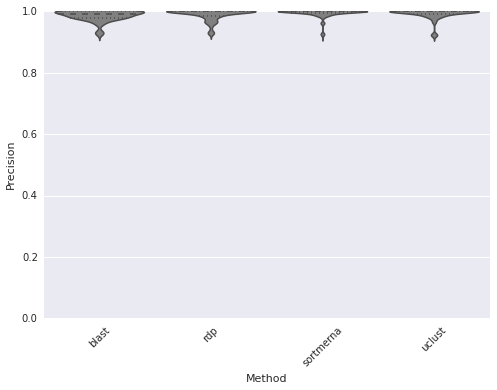

In [8]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="Precision")

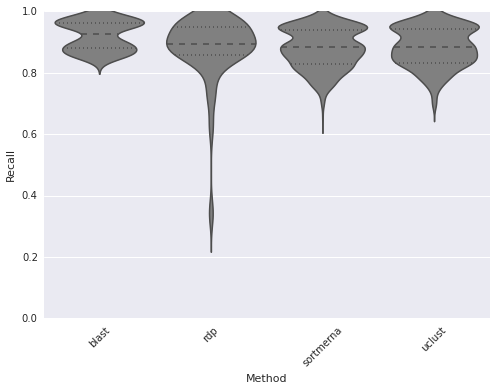

In [9]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="Recall")

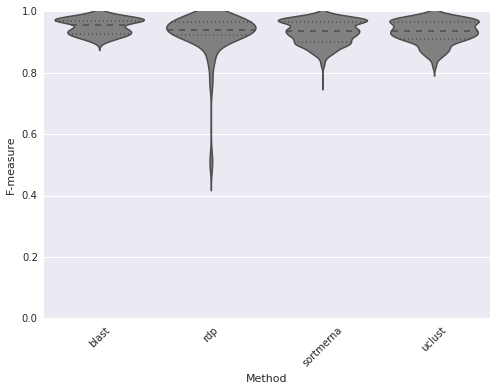

In [10]:
boxplot_from_data_frame(simulated_results, group_by="Method", metric="F-measure")

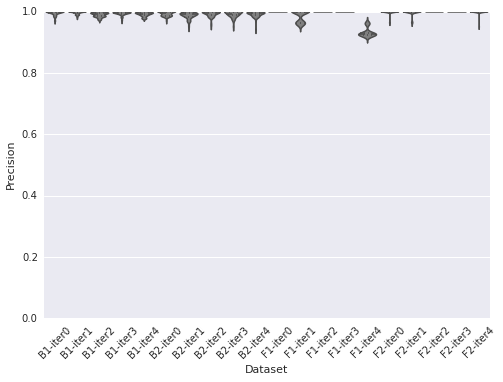

In [11]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="Precision")

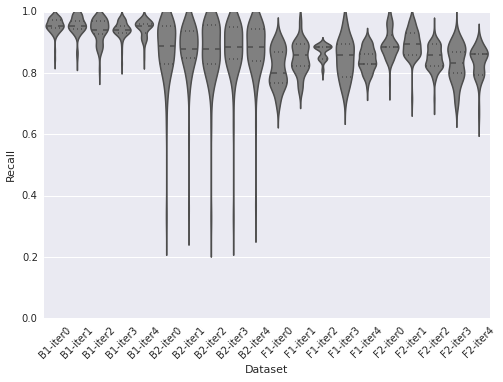

In [12]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="Recall")

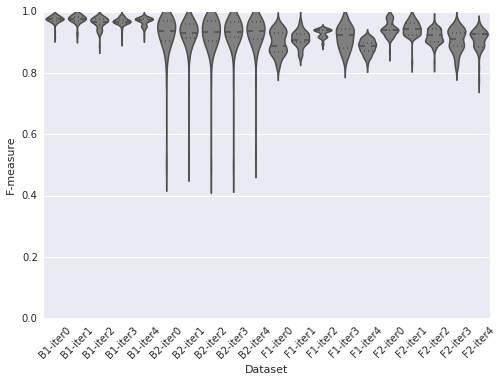

In [13]:
boxplot_from_data_frame(simulated_results, group_by="Dataset", metric="F-measure")

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


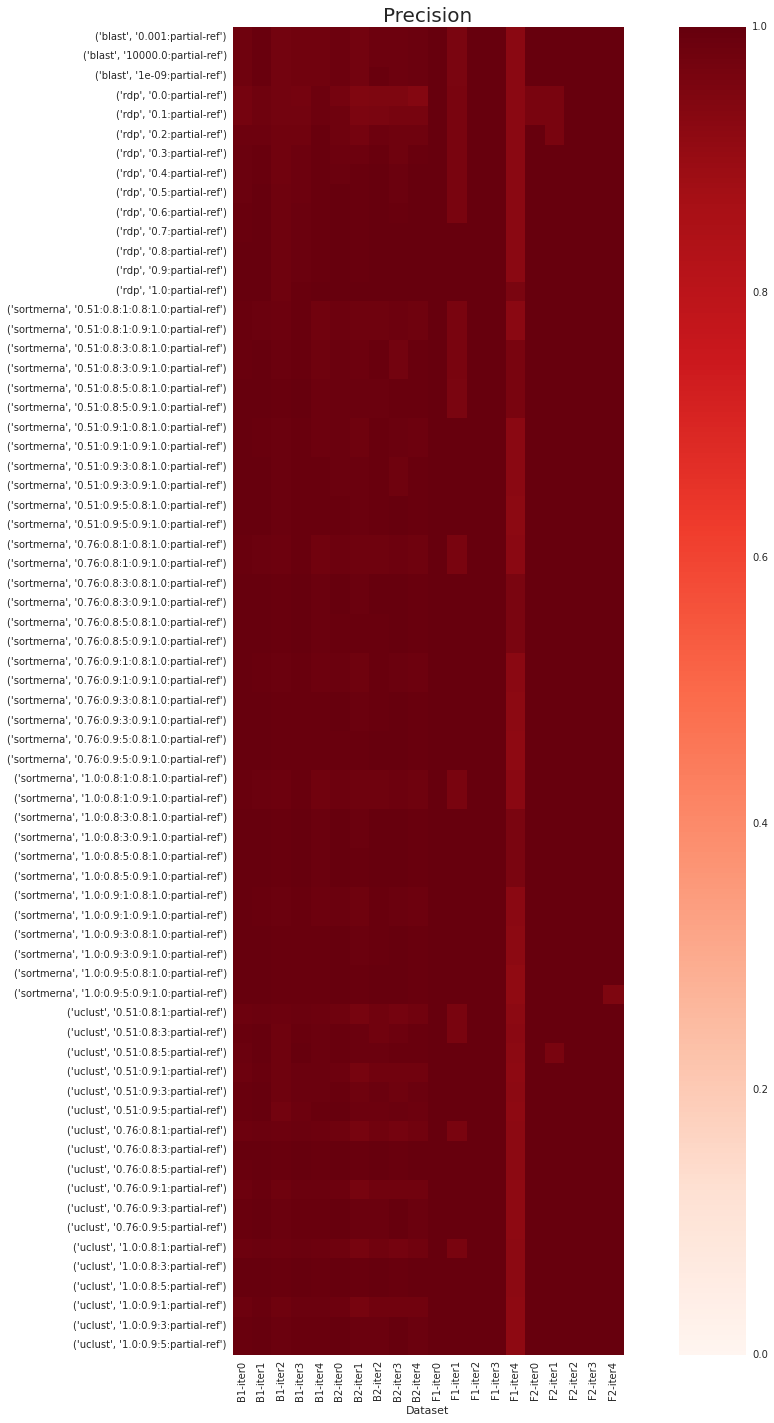

In [14]:
heatmap_from_data_frame(simulated_results, "Precision")

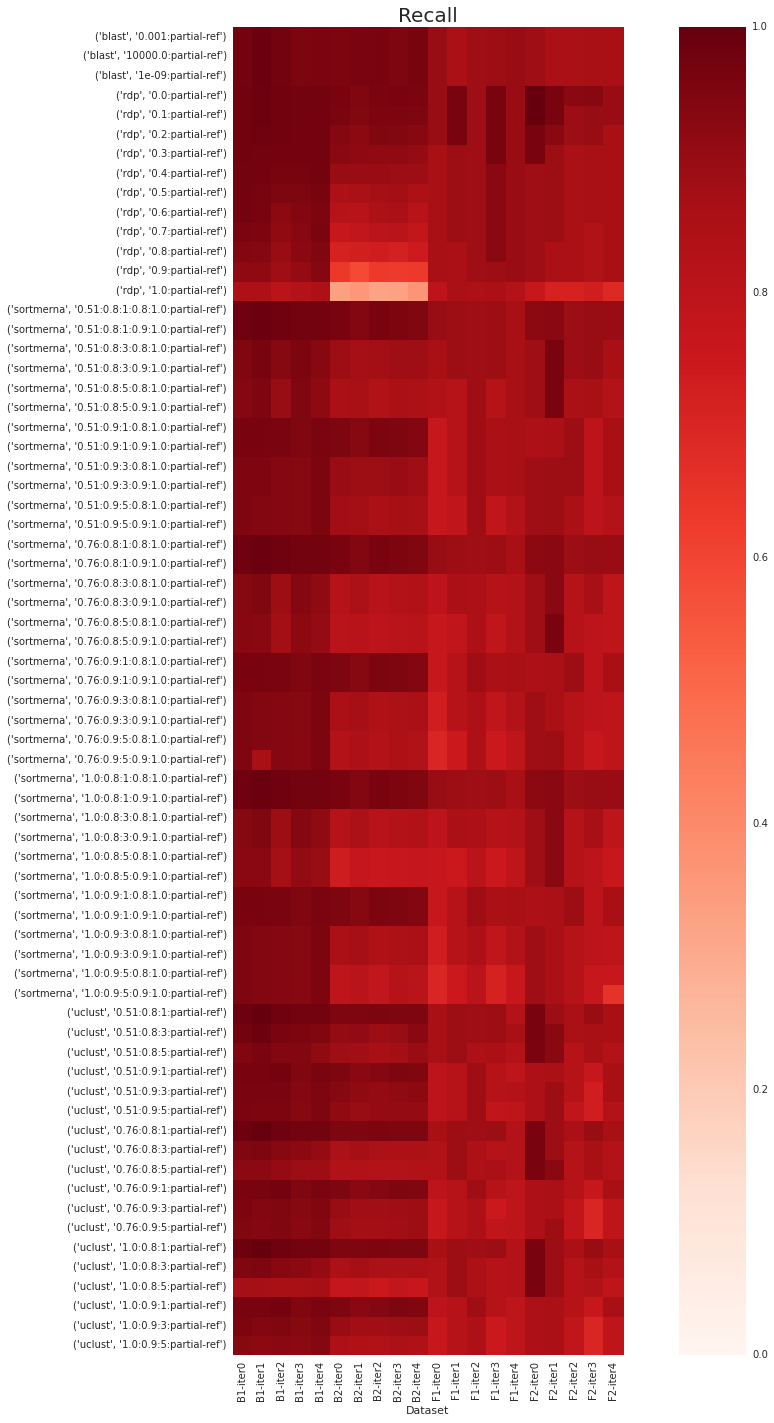

In [15]:
heatmap_from_data_frame(simulated_results, "Recall")

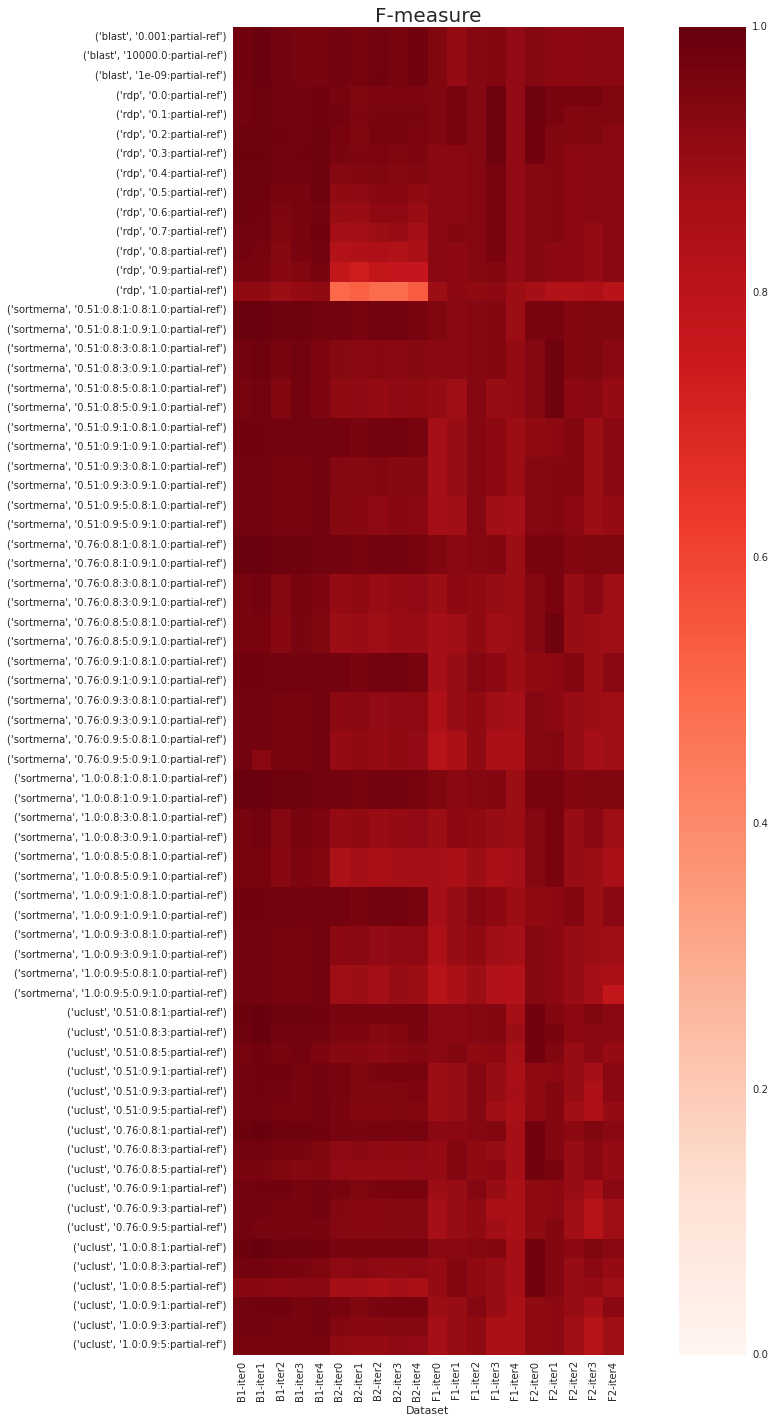

In [16]:
heatmap_from_data_frame(simulated_results, "F-measure")

In [17]:
method_by_dataset_a1(simulated_results, 'B1-iter0')

Method  Precision    Recall  F-measure
136  sortmerna   0.996063  0.980620   0.988281
247     uclust   0.984496  0.984496   0.984496
233        rdp   0.992126  0.976744   0.984375
212      blast   0.980469  0.972868   0.976654

In [18]:
method_by_dataset_a1(simulated_results, 'B2-iter0')

Method  Precision    Recall  F-measure
2040  sortmerna   0.984674  0.962547   0.973485
2138        rdp   0.980843  0.958801   0.969697
2117      blast   0.984556  0.955056   0.969582
2154     uclust   0.984496  0.951311   0.967619

In [19]:
method_by_dataset_a1(simulated_results, 'F1-iter0')

Method  Precision    Recall  F-measure
1904  sortmerna          1  0.900000   0.947368
2002        rdp          1  0.900000   0.947368
1976      blast          1  0.900000   0.947368
2009     uclust          1  0.866667   0.928571

In [20]:
method_by_dataset_a1(simulated_results, 'F2-iter0')

Method  Precision    Recall  F-measure
1186        rdp   0.962963  1.000000   0.981132
1223     uclust   1.000000  0.961538   0.980392
1134  sortmerna   1.000000  0.923077   0.960000
1165      blast   1.000000  0.884615   0.938776

## Evaluation 2: Rank-based statistics comparing the performance of the optimal parameter setting run for each method on each data set.

*Count best* column indicates how many samples a given method achieved the best result or tied for the best result (which is why they sum to more than the total number of samples).

### Within-method comparisons of parameter performance

In [21]:
metrics = ['Precision', 'Recall', 'F-measure']

In [22]:
rdp_top_params = parameter_comparisons(simulated_results, "rdp", metrics=metrics)
rdp_top_params[:15]

F-measure  Precision  Recall       Mean
0.0:partial-ref         10          6      20  12.000000
0.1:partial-ref         10          6      12   9.333333
0.2:partial-ref          8          7       7   7.333333
0.3:partial-ref          7          8       4   6.333333
0.8:partial-ref          2         15       2   6.333333
0.9:partial-ref          2         15       2   6.333333
1.0:partial-ref          0         19       0   6.333333
0.7:partial-ref          2         14       2   6.000000
0.5:partial-ref          2         13       2   5.666667
0.6:partial-ref          2         12       2   5.333333
0.4:partial-ref          3         10       2   5.000000

In [23]:
uclust_top_params = parameter_comparisons(simulated_results, "uclust", metrics=metrics)
uclust_top_params[:15]

F-measure  Precision  Recall       Mean
0.51:0.8:1:partial-ref         15          8      18  13.666667
1.0:0.8:1:partial-ref          15          8      18  13.666667
0.76:0.8:1:partial-ref         15          8      18  13.666667
0.51:0.8:3:partial-ref          8         10       9   9.000000
1.0:0.8:3:partial-ref           2         17       2   7.000000
0.76:0.8:3:partial-ref          2         17       2   7.000000
0.76:0.8:5:partial-ref          3         14       3   6.666667
1.0:0.8:5:partial-ref           2         15       2   6.333333
1.0:0.9:1:partial-ref           4          9       4   5.666667
0.76:0.9:1:partial-ref          4          9       4   5.666667
0.51:0.9:1:partial-ref          4          9       4   5.666667
0.51:0.8:5:partial-ref          3         10       4   5.666667
0.51:0.9:5:partial-ref          1         12       1   4.666667
0.51:0.9:3:partial-ref          2         10       2   4.666667
0.76:0.9:3:partial-ref          0         12       0   4.000000

In [24]:
sortmerna_top_params = parameter_comparisons(simulated_results, "sortmerna", metrics=metrics)
sortmerna_top_params[:15]

F-measure  Precision  Recall       Mean
0.51:0.8:1:0.8:1.0:partial-ref         17          8      19  14.666667
0.51:0.8:1:0.9:1.0:partial-ref         17          8      19  14.666667
1.0:0.8:1:0.8:1.0:partial-ref          17          8      19  14.666667
0.76:0.8:1:0.9:1.0:partial-ref         17          8      19  14.666667
0.76:0.8:1:0.8:1.0:partial-ref         17          8      19  14.666667
1.0:0.8:1:0.9:1.0:partial-ref          17          8      19  14.666667
0.51:0.8:3:0.8:1.0:partial-ref          7         11       7   8.333333
0.51:0.8:3:0.9:1.0:partial-ref          7         11       7   8.333333
0.51:0.9:3:0.9:1.0:partial-ref          2         13       3   6.000000
0.51:0.9:3:0.8:1.0:partial-ref          2         13       3   6.000000
0.51:0.8:5:0.9:1.0:partial-ref          3         12       3   6.000000
0.51:0.8:5:0.8:1.0:partial-ref          3         12       3   6.000000
1.0:0.9:1:0.8:1.0:partial-ref           3         10       3   5.333333
1.0:0.9:1:0.9:1.0:partial-ref           3         10       3   5.333333
1.0:0.9:5:0.8:1.0:partial-ref           0         16       0   5.333333

In [25]:
blast_top_params = parameter_comparisons(simulated_results, "blast", metrics=metrics)
blast_top_params[:15]

F-measure  Precision  Recall       Mean
1e-09:partial-ref           20         20      20  20.000000
0.001:partial-ref           19         19      20  19.333333
10000.0:partial-ref         19         19      20  19.333333

### Between-method performance comparisons based on best parameter set determined above

In [26]:
mp_combs = {}
for e in ['rdp', 'blast', 'sortmerna', 'uclust']:
    mp_combs[e] = parameter_comparisons(simulated_results, e, metrics=['F-measure']).index[0]

In [27]:
metric = 'Precision'
df = performance_rank_comparisons(simulated_results, metric, mp_combs)
if write_xls_files: 
    df.to_excel('tables/level%d_%s_rankstats.xlsx' % (taxonomic_level, metric), 
                                      na_rep='NA', float_format="%1.3f")
df

Count best  sortmerna: wilcoxon stat  sortmerna: wilcoxon p  \
sortmerna          14                       NaN                    NaN   
blast              12                        29               0.432768   
uclust             10                         8               0.046853   
rdp                 9                         6               0.003510   

           blast: wilcoxon stat  blast: wilcoxon p  uclust: wilcoxon stat  \
sortmerna                    29           0.432768                      8   
blast                       NaN                NaN                     28   
uclust                       28           0.388186                    NaN   
rdp                           6           0.005772                      3   

           uclust: wilcoxon p  rdp: wilcoxon stat  rdp: wilcoxon p  
sortmerna            0.046853                   6         0.003510  
blast                0.388186                   6         0.005772  
uclust                    NaN                   3         0.002977  
rdp                  0.002977                 NaN              NaN

In [28]:
metric = 'Recall'
df = performance_rank_comparisons(simulated_results, metric, mp_combs)
if write_xls_files: 
    df.to_excel('tables/level%d_%s_rankstats.xlsx' % (taxonomic_level, metric), 
                                      na_rep='NA', float_format="%1.3f")
df

Count best  rdp: wilcoxon stat  rdp: wilcoxon p  \
rdp                14                 NaN              NaN   
sortmerna           8                  10         0.007601   
blast               6                  19         0.006468   
uclust              6                  15         0.003553   

           sortmerna: wilcoxon stat  sortmerna: wilcoxon p  \
rdp                            10.0               0.007601   
sortmerna                       NaN                    NaN   
blast                          24.5               0.043645   
uclust                         28.0               0.221330   

           blast: wilcoxon stat  blast: wilcoxon p  uclust: wilcoxon stat  \
rdp                        19.0           0.006468                   15.0   
sortmerna                  24.5           0.043645                   28.0   
blast                       NaN                NaN                   42.5   
uclust                     42.5           0.320060                    NaN   

           uclust: wilcoxon p  
rdp                  0.003553  
sortmerna            0.221330  
blast                0.320060  
uclust                    NaN

In [29]:
metric = 'F-measure'
df = performance_rank_comparisons(simulated_results, metric, mp_combs)
if write_xls_files: 
    df.to_excel('tables/level%d_%s_rankstats.xlsx' % (taxonomic_level, metric), 
                                      na_rep='NA', float_format="%1.3f")
df

Count best  rdp: wilcoxon stat  rdp: wilcoxon p  \
rdp                11                 NaN              NaN   
sortmerna           8                  63         0.522781   
blast               6                  47         0.162572   
uclust              4                  52         0.144582   

           sortmerna: wilcoxon stat  sortmerna: wilcoxon p  \
rdp                              63               0.522781   
sortmerna                       NaN                    NaN   
blast                            31               0.031249   
uclust                           26               0.053474   

           blast: wilcoxon stat  blast: wilcoxon p  uclust: wilcoxon stat  \
rdp                        47.0           0.162572                   52.0   
sortmerna                  31.0           0.031249                   26.0   
blast                       NaN                NaN                   53.5   
uclust                     53.5           0.453313                    NaN   

           uclust: wilcoxon p  
rdp                  0.144582  
sortmerna            0.053474  
blast                0.453313  
uclust                    NaN